<a href="https://colab.research.google.com/github/siddhilandge/NNDL_2022/blob/main/Practical%201.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline


In [2]:
df=pd.read_csv('/content/Churn_Modelling.csv')


In [3]:
df.drop('CustomerId',axis='columns',inplace=True)


In [5]:
df.dtypes


RowNumber            int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [6]:
df.drop(['RowNumber', 'Surname'],axis='columns',inplace=True)


In [7]:
df.dtypes


CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [8]:
df.shape


(10000, 11)

In [9]:
df.sample(5)


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
14,635,Spain,Female,35,7,0.00,2,1,1,65951.65,0
4577,580,Germany,Male,39,3,119688.81,1,1,0,137041.26,0
1165,712,Germany,Female,49,5,154776.42,2,0,0,196257.68,0
5537,527,Germany,Female,41,10,136733.24,1,1,1,57589.29,0
9293,771,Germany,Female,38,5,137657.71,2,1,0,72985.61,0


In [10]:
df['Gender'].replace({'Female':1,'Male':0},inplace=True)


In [11]:
df.sample(10)




,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
7577,615,Germany,0,43,3,86920.86,1,1,1,150048.37,0
6199,449,Spain,1,33,8,0.00,2,0,0,156792.89,0
9888,637,France,1,21,10,125712.20,1,0,0,175072.47,0
2256,696,France,0,33,2,163139.27,1,1,1,7035.36,0
9477,655,France,1,41,5,0.00,1,0,0,36548.00,1
1260,704,Germany,0,27,5,147004.34,1,1,0,64381.33,1
6101,833,Spain,0,32,6,0.00,1,1,1,44323.22,1
1728,758,Spain,1,40,5,93499.82,2,0,0,123218.81,0
6908,733,Spain,1,38,5,0.00,2,1,1,1271.51,0
9043,727,Germany,0,39,5,80615.46,2,0,0,180962.32,0


In [12]:
df1 = pd.get_dummies(data=df, columns=['Geography'])


In [13]:
df1.sample(10)


,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
6271,747,0,49,6,202904.64,1,1,1,17298.72,1,1,0,0
848,611,0,51,1,122874.74,1,1,1,149648.45,0,0,0,1
5490,655,1,78,2,0.00,2,0,1,188435.38,0,0,0,1
9463,664,0,24,7,0.00,1,0,1,35611.35,0,1,0,0
8402,549,0,36,6,139422.37,1,0,0,83983.39,1,0,1,0
3146,548,1,28,8,116755.50,2,1,1,158585.17,1,1,0,0
7936,468,0,22,2,0.00,2,1,0,28123.99,0,1,0,0
7445,516,1,45,4,0.00,1,1,0,95273.73,1,1,0,0
5654,677,1,43,3,133214.88,2,1,1,95936.84,0,0,0,1
4908,540,0,48,2,109349.29,1,1,0,88703.04,1,1,0,0


In [14]:
df1.dtypes


CreditScore            int64
Gender                 int64
Age                    int64
Tenure                 int64
Balance              float64
NumOfProducts          int64
HasCrCard              int64
IsActiveMember         int64
EstimatedSalary      float64
Exited                 int64
Geography_France       uint8
Geography_Germany      uint8
Geography_Spain        uint8
dtype: object

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


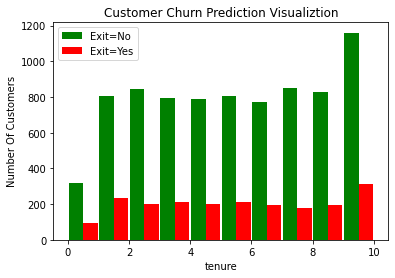

In [15]:
tenure_exit_no = df1[df1.Exited==0].Tenure
tenure_exit_yes = df1[df1.Exited==1].Tenure

plt.xlabel("tenure")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

plt.hist([tenure_exit_no, tenure_exit_yes], rwidth=0.95, color=['green','red'],label=['Exit=No','Exit=Yes'])
plt.legend()


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


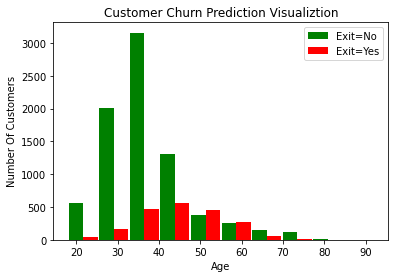

In [16]:
age_exit_no = df[df.Exited==0].Age
age_exit_yes = df[df.Exited==1].Age

plt.xlabel("Age")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

plt.hist([age_exit_no, age_exit_yes], rwidth=0.95, color=['green','red'],label=['Exit=No','Exit=Yes'])
plt.legend()


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


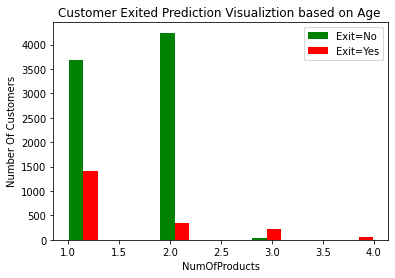

In [17]:
exited_no = df1[df1.Exited==0].NumOfProducts
exited_yes = df1[df1.Exited==1].NumOfProducts

plt.xlabel("NumOfProducts")
plt.ylabel("Number Of Customers")
plt.title("Customer Exited Prediction Visualiztion based on Age ")

plt.hist([exited_no,exited_yes], rwidth=0.95, color=['green','red'],label=['Exit=No','Exit=Yes'])
plt.legend()


In [18]:
cols_to_scale = ['CreditScore','Age','Tenure','Balance','EstimatedSalary','NumOfProducts']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df1[cols_to_scale] = scaler.fit_transform(df1[cols_to_scale])


In [19]:
df1.sample(5)


,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
9712,0.574,0,0.189189,0.3,0.000000,0.333333,1,1,0.989172,0,1,0,0
8255,0.450,1,0.297297,0.1,0.556132,0.000000,1,0,0.906501,0,1,0,0
5324,0.608,0,0.175676,0.5,0.600218,0.333333,1,1,0.526085,0,0,1,0
8746,0.620,0,0.216216,0.8,0.424422,0.333333,0,1,0.911342,0,1,0,0
1236,0.624,0,0.202703,0.0,0.412405,0.000000,1,1,0.813535,0,0,1,0


In [20]:
df1.shape


(10000, 13)

In [22]:
X = df1.drop('Exited',axis='columns')
y = df1['Exited']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)


In [23]:
X_train.shape


(8000, 12)

In [ ]:
X_test.shape


In [25]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
        keras.layers.Dense(12, input_shape = (12,), activation = 'relu'),
        keras.layers.Dense(12, activation = 'relu'),
        keras.layers.Dense(1, activation = 'sigmoid')]) 


model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = 'accuracy')
model.fit(X_train, y_train, epochs = 100)


Epoch 1/100
250/250 [==============================] - 1s 1ms/step - loss: 0.5281 - accuracy: 0.7928
Epoch 2/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4813 - accuracy: 0.7960
Epoch 3/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4673 - accuracy: 0.7968
Epoch 4/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4557 - accuracy: 0.8024
Epoch 5/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4444 - accuracy: 0.8058
Epoch 6/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4335 - accuracy: 0.8109
Epoch 7/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4244 - accuracy: 0.8174
Epoch 8/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4138 - accuracy: 0.8215
Epoch 9/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4016 - accuracy: 0.8294
Epoch 10/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3936 - accura

In [26]:
model.evaluate(X_test, y_test)


63/63 [==============================] - 0s 1ms/step - loss: 0.3518 - accuracy: 0.8480


[0.3518049418926239, 0.8479999899864197]

In [27]:
yp = model.predict(X_test)
yp[:5]

array([[0.01773944],
       [0.09929302],
       [0.07401919],
       [0.09574354],
       [0.05373415]], dtype=float32)

In [28]:
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)


In [29]:
y_pred[:10]


[0, 0, 0, 0, 0, 0, 0, 0, 0, 1]

In [30]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.88      0.94      0.91      1595
           1       0.67      0.50      0.57       405

    accuracy                           0.85      2000
   macro avg       0.77      0.72      0.74      2000
weighted avg       0.84      0.85      0.84      2000



Text(69.0, 0.5, 'Truth')

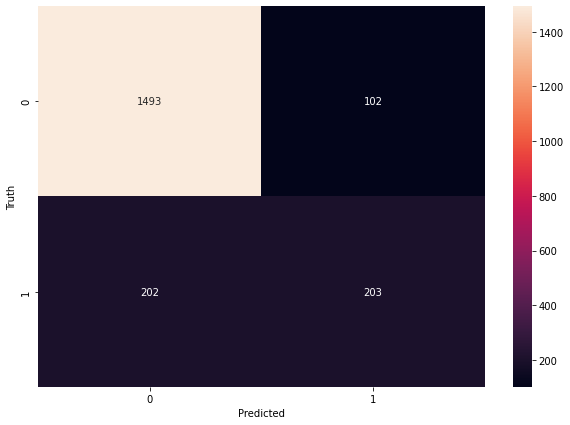

In [31]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')


In [32]:
round((1520+192)/(1520+192+75+213),2)


0.86

In [33]:
round(1520/(1520+192),2)


0.89

In [34]:
round(192/(192+75),2)


0.72

In [35]:
round(1520/(1520+75),2)


0.95

In [37]:
round(192/(213+192),2)


0.47